In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [163]:
def plot_map(mymap,title="mymap",label = None):
    plt.imshow(mymap,cmap = "tab20c")
    plt.title(title)
    plt.hlines(np.linspace(0.5,mymap.shape[0]-0.5,mymap.shape[0]),0-0.5,mymap.shape[1]-0.5,color = [0,0,0])
    plt.vlines(np.linspace(0.5,mymap.shape[1]-0.5,mymap.shape[1]),0-0.5,mymap.shape[0]-0.5,color = [0,0,0])
    if type(label)!=type(None):
        for i in range(label.shape[0]):
            for j in range(label.shape[1]):
                if label[i,j]!=0:
                    plt.text(j,i,str(int(label[i,j])))
    plt.show()
def generate_map(x,y):
    mymap = np.round(np.random.random_sample((x,y)))
    return mymap

[[1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]]


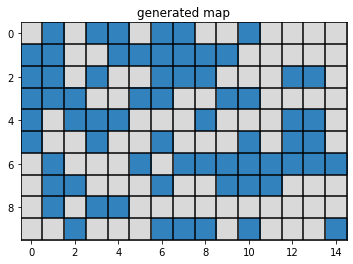

In [164]:
mymap = generate_map(10,15)
print(mymap)
plot_map(mymap,"generated map")

The time complexity will be $O(W\bullet H)$ where W and H are the width and height of the map.<br>
The memory complexity of this method will be $O(W)$.<br> 
However, in order to draw the final result, I will keep all the lines in memory. So the memory usage here will be $O(W\bullet H)$ as well.

In [180]:
def count_lake(mymap):
    labeled_map = np.zeros(mymap.shape)
    mymap = np.pad(mymap,1,constant_values=1)
    prev_marking = np.zeros(mymap.shape[1])
    n_lakes = 0
    merge=dict()
    for i in range(mymap.shape[0]-2):
        this_marking = np.zeros(mymap.shape[1])
        for j in range(mymap.shape[1]-2):
            if mymap[i+1,j+1]==0:
                for item in [prev_marking[j],prev_marking[j+1],prev_marking[j+2],this_marking[j]]:
                    if item in merge:
                        item = merge[item]
                    if item!=this_marking[j+1] and item!=0:
                        if this_marking[j+1]==0:
                            this_marking[j+1]=item
                        else:
                            merge[item] = this_marking[j+1]
                if this_marking[j+1]==0:
                    n_lakes +=1
                    this_marking[j+1]=n_lakes
        prev_marking = this_marking
        labeled_map[i]=prev_marking[1:-1]

    return n_lakes-len(merge), labeled_map,merge

In [181]:
count, labeledmap, merge =count_lake(mymap)

In [182]:
count

6

In [159]:
def final_class(i,merge_dict):
    if i in merge_dict:
        return final_class(merge_dict[i],merge_dict)
    else:
        return i
def relabel(input_map,merge_dict):
    label_dict = dict()
    n_lakes = 0
    output_map = np.zeros(input_map.shape)
    for i in range(input_map.shape[0]):
        for j in range(input_map.shape[1]):
            if input_map[i,j]!=0:
                fc = final_class(input_map[i,j],merge_dict)
                if fc in label_dict:
                    output_map[i,j] = label_dict[fc]
                else:
                    n_lakes+=1
                    label_dict[fc] = n_lakes
                    output_map[i,j] = n_lakes
    return output_map

In [183]:
relabeled = relabel(labeledmap,merge)

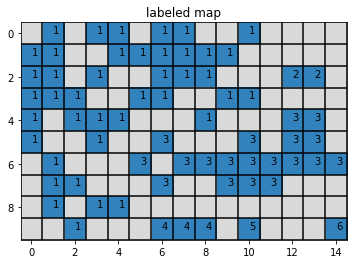

In [184]:
plot_map(mymap,"labeled map",relabeled)